<a href="https://colab.research.google.com/github/annasugian/Anna_Sugian_Basics/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B59.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Установка VK API

In [ ]:
!pip install vk_api

Получаем токен на vkhost;

- выбираем vk.com

- принимаем условия

- копируем код из строки браузера (да-да, там, где написано "не копируйте")

Токен живет 1 час, он расположен между `https://oauth.vk.com/blank.html#access_token=` и `user_id=61895623`

```
https://oauth.vk.com/blank.html#access_token=ЗДЕСЬ ВАШ ТОКЕН&user_id=61895623
```

Токен привязан к вашему IP, поэтому запускаем его локально!

***Комментарий:*** Я обнаружила ошибку в задании. Токен будет между `https://oauth.vk.com/blank.html#access_token=` и `&expires_in=`

In [ ]:
# https://vkhost.github.io/

import vk_api

vkApiSession= vk_api.VkApi(token=vk_token) #свой токен я сохранила в переменную vk_token, но ячейку удалила

vk = vkApiSession.get_api()

`-20629724` - ID паблика "Хабр" ВК

ID пользователей имеют вид `00000000`

ID сообществ имеют вид `-00000000`

Выгрузим 100 верхних постов и выведем результат

***Комментарий***: Я вывела 1 результат, так как, выводя 100, документ не считывался в гитхаб из-за слишком большого количества аутпута.

In [55]:
posts = vk.wall.get(owner_id=-20629724, count=1)['items']
posts

[{'inner_type': 'wall_wallpost',
  'ads_easy_promote': {'type': 2,
   'text': 'Что-то пошло не так.',
   'label_text': '',
   'button_text': '',
   'is_ad_not_easy': False},
  'is_pinned': 1,
  'comments': {'can_post': 1, 'count': 4, 'groups_can_post': True},
  'marked_as_ads': 0,
  'hash': 'mxV4S9-fiJ8Dirl2XqD6elS1EcEz',
  'type': 'post',
  'push_subscription': {'is_subscribed': False},
  'attachments': [{'type': 'photo',
    'photo': {'album_id': -7,
     'date': 1733146247,
     'id': 457329364,
     'owner_id': -20629724,
     'access_key': 'dcf0e7872d268e2c46',
     'post_id': 1599192,
     'sizes': [{'height': 125,
       'type': 'm',
       'width': 130,
       'url': 'https://sun1-85.userapi.com/s/v1/ig2/okAKn8w7SZIR3O_QCXgzKKU9vZMJQwlwbHjBkccN9-Fl0ikr3DI3w2rjMMuh_fVIOW-lIwspMWP0nZnYeL3t3gha.jpg?quality=96&as=32x31,48x46,72x70,108x104,160x154,240x232,360x348,480x463,540x521,640x618,720x695,810x782&from=bu&u=gMl10p3ylManiwDUgOJd1Q8TSCITRoZ3m871rZVQYH0&cs=130x125'},
      {'heigh

**Задание**

1. Изучите [**документацию VK API**](https://dev.vk.com/ru/method/wall)

2. Выберите **сообщество** для скрейпинга данных

3. Произведите **парсинг** выгруженных данных:

- извлеките изображение под постом

- извлеките текст публикации

- извлеките любую статистику, например, количество просмотров

4. Сформируйте файл ***.csv**

Используйте шаблон:

Использовала данные сообщества ВК [МОХ | медиа о ханты и не только](https://vk.com/itak_proekt)

In [ ]:
import vk_api
import csv
import pandas as pd

def scrape_wall_data(token, owner_id, count=10):
    """
    Функция для извлечения данных со стены ВКонтакте.

    Аргументы:
    token - строка, токен доступа к API ВКонтакте
    owner_id - int, ID сообщества или пользователя
    count - int, количество постов для извлечения (по умолчанию 10)

    Возвращает:
    Список словарей, содержащих данные постов.
    """
    try:
        # Инициализация VK API
        vk_session = vk_api.VkApi(token=token)
        vk = vk_session.get_api()

        # Метод wall.get - возвращает объект, содержащий число результатов в поле count и массив объектов записей на стене в поле items.
        posts = vk.wall.get(owner_id=owner_id, count=count)['items']

        # Хранилище для данных
        scraped_data = []

        # Парсинг
        for post in posts:
            post_data = {
                'post_id': post['id'],
                'date': post['date'],
                'text': post.get('text', ''),
                'likes': post['likes']['count'],
                'reposts': post['reposts']['count'],
                'comments': post['comments']['count'],
                'attachments': post.get('attachments', [])
            }
            scraped_data.append(post_data)

        return scraped_data

    except vk_api.exceptions.ApiError as e:
        print(f"Error accessing VK API: {e}")
        return []
data1 = scrape_wall_data(token=vk_token, owner_id=-84438562, count=10)

In [ ]:
# Допишите функцию для сохранения *.csv
def save_to_csv(data, file_name='vk_wall_posts.csv'):

   # Cоздаем файл в режиме записи
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:

        # Создание объекта DictWriter, который будет использоваться для записи словарей в файл. Этот объект автоматически сопоставляет ключи словаря с заголовками столбцов.
        writer = csv.DictWriter(file, fieldnames=['post_id', 'date', 'text', 'likes', 'reposts', 'comments', 'attachments']) #переменная fieldnames содержит список строк, которые представляют заголовки столбцов для CSV файла.

        # Метод writer.writeheader() записывает заголовки (первую строку) в файл, используя ключи из fieldnames.
        writer.writeheader()

        # Для каждого словаря вызывается метод writer.writerow(row), который записывает текущий словарь в файл как новую строку. Ключи словаря должны совпадать с заголовками, чтобы данные корректно располагались в соответствующих столбцах.
        for row in data:
            writer.writerow(row)

data2 = save_to_csv(data1, file_name='vk_wall_posts.csv')

   post_id        date                                               text  \
0     1240  1733814002  [club84438562|С 94-летием, Ямал!] \n\nСегодня,...   
1     1238  1733724001                                                      
2     1234  1733464800  [club84438562|Композиция на варгане «Музыка ту...   
3     1232  1733295262  [club84438562|«Мүнхэ Байкал» - что значит Байк...   
4     1231  1733137689  Чабан Дилшод и Красноярское водохранилище. \n ...   

   likes  reposts  comments                                        attachments  
0     20        2         0  [{'type': 'video', 'video': {'response_type': ...  
1     15        3         0  [{'type': 'video', 'video': {'response_type': ...  
2     50        3         2  [{'type': 'video', 'video': {'response_type': ...  
3     13        1         0  [{'type': 'photo', 'photo': {'album_id': -7, '...  
4     28        2         0  [{'type': 'photo', 'photo': {'album_id': 30516...  
Среднее количество лайков: 37.5
Среднее количество 

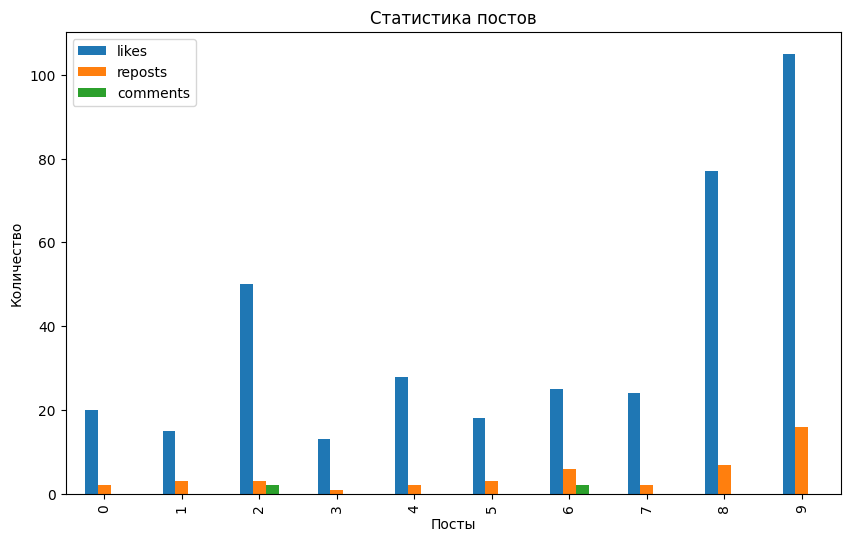

In [ ]:
import matplotlib.pyplot as plt

def stats(data):
  '''
  Функция для анализа и визуализации данных.

  Аргументы:
  data - список словарей, содержащих данные постов
  '''
  df = pd.DataFrame(data)

  # Вывод первых нескольких строк данных
  print(df.head())

  # Простой анализ: среднее количество лайков, репостов и комментариев
  print("Среднее количество лайков:", df['likes'].mean()) # Функция mean() помогает вычислить среднее значение набора значений, переданных в функцию.
  print("Среднее количество репостов:", df['reposts'].mean())
  print("Среднее количество комментариев:", df['comments'].mean())

  # Визуализация
  df[['likes', 'reposts', 'comments']].plot(kind='bar', figsize=(10, 6))
  plt.title('Статистика постов')
  plt.xlabel('Посты')
  plt.ylabel('Количество')
  plt.show()
  pass
data3 = stats(data1)
data3

Данные успешно сохранены в vk_wall_posts.csv
   post_id        date                                               text  \
0     1240  1733814002  [club84438562|С 94-летием, Ямал!] \n\nСегодня,...   
1     1238  1733724001                                                      
2     1234  1733464800  [club84438562|Композиция на варгане «Музыка ту...   
3     1232  1733295262  [club84438562|«Мүнхэ Байкал» - что значит Байк...   
4     1231  1733137689  Чабан Дилшод и Красноярское водохранилище. \n ...   

   likes  reposts  comments                                        attachments  
0     20        2         0  [{'type': 'video', 'video': {'response_type': ...  
1     15        3         0  [{'type': 'video', 'video': {'response_type': ...  
2     50        3         2  [{'type': 'video', 'video': {'response_type': ...  
3     13        1         0  [{'type': 'photo', 'photo': {'album_id': -7, '...  
4     28        2         0  [{'type': 'photo', 'photo': {'album_id': 30516...  
Средне

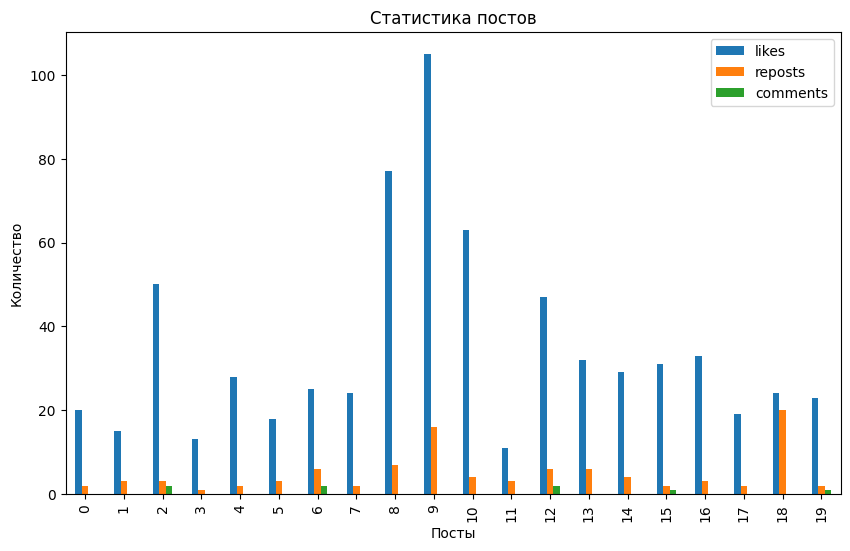

In [ ]:
# Функция для выполнения задачи
def main():
    # Введите ваш токен VK API
    token = vk_token

    # Введите ID сообщества
    owner_id = -84438562

    # Введите количество публикаций для скрейпинга
    num_posts = 20

    # Запустите функцию для скрейпинга
    wall_data = scrape_wall_data(token, owner_id, count=num_posts)

    if wall_data:
        # Запустите функцию для сохранения в CSV
        save_to_csv(wall_data)
        print("Данные успешно сохранены в vk_wall_posts.csv")

        # Выведите статистику по выгруженной информации
        stats(wall_data)
    else:
        print("No data")

if __name__ == "__main__":
    main()

Попробовала с другим сообществом ([Тату-студия Литература](https://vk.com/tattooo))

Данные успешно сохранены в vk_wall_posts.csv
   post_id        date                                               text  \
0    69918  1733830072  Скидка на сертификаты растаяла до 15% и будет ...   
1    69911  1733748055                                                      
2    69910  1733572955  Когда мама не в восторге от татуировок😁\n\nЗад...   
3    69909  1733490523                                                      
4    69908  1733480625  У вас осталось всего 4 дня, чтобы приобрести с...   

   likes  reposts  comments                                        attachments  
0      2        0         0  [{'type': 'photo', 'photo': {'album_id': -7, '...  
1     12        0         3  [{'type': 'video', 'video': {'response_type': ...  
2     21        1         0  [{'type': 'photo', 'photo': {'album_id': -7, '...  
3     14        1         0  [{'type': 'video', 'video': {'response_type': ...  
4      1        0         0  [{'type': 'photo', 'photo': {'album_id': -7, '...  
Средне

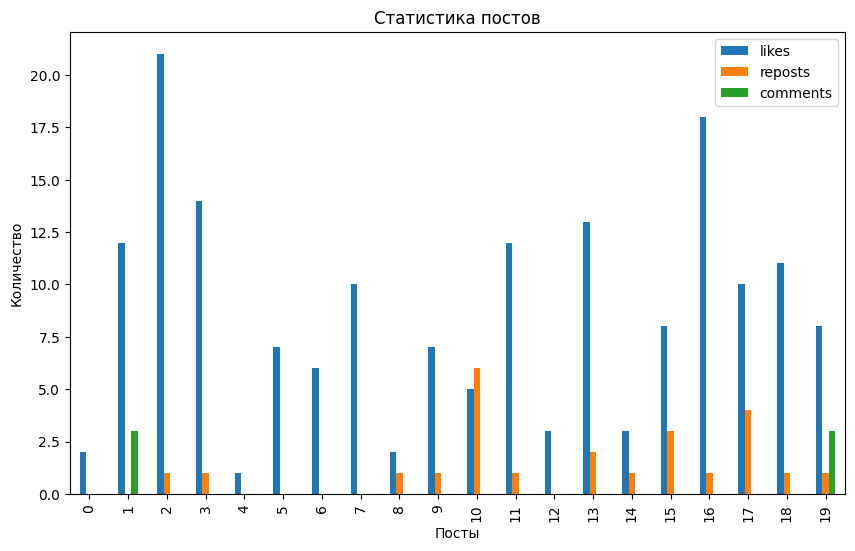

In [ ]:
# Функция для выполнения задачи
def main():
    # Введите ваш токен VK API
    token = vk_token

    # Введите ID сообщества
    owner_id = -51302644

    # Введите количество публикаций для скрейпинга
    num_posts = 20

    # Запустите функцию для скрейпинга
    wall_data = scrape_wall_data(token, owner_id, count=num_posts)

    if wall_data:
        # Запустите функцию для сохранения в CSV
        save_to_csv(wall_data)
        print("Данные успешно сохранены в vk_wall_posts.csv")

        # Выведите статистику по выгруженной информации
        stats(wall_data)
    else:
        print("No data")

if __name__ == "__main__":
    main()